In [6]:
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta
from biogeme.expressions import log
import math
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Estimation_File.csv', index_col = 0)

In [8]:
for col in df.columns:
    print(col)

YEAR
MONTH
DOW
HOUR
ORIGIN
DESTINATION
TRAVEL_TIME_MINUTES
TRIP_LENGTH_MILES
ORIGIN_COM_AREA
DEST_COM_AREA
FARE
TIP
ADDITIONAL_CHARGES
TOTAL_COST
SHARED_FLAGGER
NUM_TRIPS_POOLED
SPEED
TRIP_ID
TRIP_START_TIME
TRIP_END_TIME
INTERNAL_UNSUPPRESSED_FLAGGER
INTERNAL_SUPPPRESSED_FLAGGER
EXTERNAL_FLAGGER
INTERNAL_EXTERNAL_FLAGGER
AIRPORT_FLAGGER
TOD_1
TOD_2
TOD_3
TOD_4
TOD_5
TRIP_TYPE
walk_distance
travel_time
TOD
TOTAL_POP_ORIGIN
MEDIAN_AGE_ORIGIN
TOTAL_HHLDS_ORIGIN
AVG_HHLD_SIZE_ORIGIN
HHLDS_MEAN_INCOME_ORIGIN
HHLDS_UNDER_35k_ORIGIN
HHLDS_35k_100k_ORIGIN
HHLDS_OVER_100k_ORIGIN
HHLDS_0_VEH_ORIGIN
AVG_VEH_PER_HHLD_ORIGIN
HHLDS_MEDIAN_INCOME_ORIGIN
TOTAL_POP_25P_BACHELORS_HIGHER_ORIGIN
TOTAL_MALE_ORIGIN
TOTAL_FEMALE_ORIGIN
MEDIAN_AGE_ORIGIN.1
TOTAL_POP_DESTINATION
MEDIAN_AGE_DESTINATION
TOTAL_HHLDS_DESTINATION
AVG_HHLD_SIZE_DESTINATION
HHLDS_MEAN_INCOME_DESTINATION
HHLDS_UNDER_35k_DESTINATION
HHLDS_35k_100k_DESTINATION
HHLDS_OVER_100k_DESTINATION
HHLDS_0_VEH_DESTINATION
AVG_VEH_PER_HHLD_DESTINA

In [9]:
df['MATCHED_FLAGGER'] = np.where(df['NUM_TRIPS_POOLED'] > 1, 1, 0)

In [10]:
df['HHLDS_MEDIAN_INCOME_ORIGIN'] = df['HHLDS_MEDIAN_INCOME_ORIGIN'].fillna(0)
df['HHLDS_MEDIAN_INCOME_DESTINATION'] = df['HHLDS_MEDIAN_INCOME_DESTINATION'].fillna(0)

In [11]:
df['HHLDS_MEDIAN_INCOME_ORIGIN_10k'] = df['HHLDS_MEDIAN_INCOME_ORIGIN']/10000
df['HHLDS_MEDIAN_INCOME_DESTINATION_10k'] = df['HHLDS_MEDIAN_INCOME_DESTINATION'] / 10000

In [12]:
df['HHLDS_UNDER_35k_ORIGIN'] = df['HHLDS_UNDER_35k_ORIGIN'].fillna(0)
df['HHLDS_UNDER_35k_DESTINATION'] = df['HHLDS_UNDER_35k_DESTINATION'].fillna(0)

df['HHLDS_35k_100k_ORIGIN'] = df['HHLDS_35k_100k_ORIGIN'].fillna(0)
df['HHLDS_35k_100k_DESTINATION'] = df['HHLDS_35k_100k_DESTINATION'].fillna(0)

df['HHLDS_OVER_100k_ORIGIN'] = df['HHLDS_OVER_100k_ORIGIN'].fillna(0)
df['HHLDS_OVER_100k_DESTINATION'] = df['HHLDS_OVER_100k_DESTINATION'].fillna(0)

In [13]:
df['AVG_HHLD_SIZE_ORIGIN'] = df['AVG_HHLD_SIZE_ORIGIN'].fillna(0)
df['AVG_HHLD_SIZE_DESTINATION'] = df['AVG_HHLD_SIZE_DESTINATION'].fillna(0)



In [14]:
df['HHLDS_UNDER_35k_ORIGIN_SHR'] = df['HHLDS_UNDER_35k_ORIGIN']/df['TOTAL_HHLDS_ORIGIN']
df['HHLDS_UNDER_35k_DESTINATION_SHR'] = df['HHLDS_UNDER_35k_DESTINATION']/df['TOTAL_HHLDS_DESTINATION']

In [15]:
df['HHLDS_UNDER_35K_0_VEH_ORIGIN'] = df['HHLDS_UNDER_35k_ORIGIN_SHR']*df['HHLDS_0_VEH_ORIGIN']
df['HHLDS_UNDER_35K_0_VEH_DESTINATION'] = df['HHLDS_UNDER_35k_DESTINATION_SHR']*df['HHLDS_0_VEH_DESTINATION']

In [16]:
df['HHLDS_UNDER_35K_0_VEH_ORIGIN'] = df['HHLDS_UNDER_35K_0_VEH_ORIGIN'].fillna(0)
df['HHLDS_UNDER_35K_0_VEH_DESTINATION'] = df['HHLDS_UNDER_35K_0_VEH_DESTINATION'].fillna(0)

In [17]:
df['MEDIAN_AGE_ORIGIN'] = df['MEDIAN_AGE_ORIGIN'].fillna(0)
df['MEDIAN_AGE_DESTINATION'] = df['MEDIAN_AGE_DESTINATION'].fillna(0)

In [18]:
df['COST'] = df['TAX'] + df['FARE']

In [19]:
# making the Biogeme Database that is used for the model estimation
database = db.Database('est_file', df[['HHLDS_UNDER_35K_0_VEH_ORIGIN','HHLDS_UNDER_35K_0_VEH_DESTINATION','YEAR','MONTH','DOW','HOUR','COST','ORIGIN','DESTINATION','SHARED_FARE','PRIVATE_FARE','TRIP_LENGTH_MILES','SHARED_TRAVEL_TIME','PRIVATE_TRAVEL_TIME','NUM_TRIPS_POOLED','SHARED_FLAGGER','INTERNAL_SUPPPRESSED_FLAGGER','AIRPORT_FLAGGER','TOD_1', 'TOD_2',
       'TOD_3', 'TOD_4', 'TOD_5','PRIVATE_TAX','SHARED_TAX','TAX','EMP_ORIGIN_DEN','EMP_DESTINATION_DEN','MEDIAN_AGE_ORIGIN','MEDIAN_AGE_DESTINATION',
        'TOTAL_POP_ORIGIN','TOTAL_POP_DESTINATION','TOTAL_HHLDS_DESTINATION','AVG_HHLD_SIZE_DESTINATION','HHLDS_MEDIAN_INCOME_DESTINATION','TOTAL_EMP_ORIGIN','TOTAL_EMP_DESTINATION','TOTAL_EMP_FLOW','MATCHED_TRAVEL_TIME','UNMATCHED_TRAVEL_TIME','NUM_MATCHED_TRIPS','UNMATCHED_FARE','MATCHED_FARE',
       'TOTAL_HHLDS_ORIGIN', 'AVG_HHLD_SIZE_ORIGIN','HHLDS_OVER_100k_ORIGIN','HHLDS_OVER_100k_DESTINATION','MATCHED_FLAGGER','TOD',
       'HHLDS_MEDIAN_INCOME_ORIGIN', 'HHLDS_UNDER_35k_ORIGIN','HHLDS_UNDER_35k_DESTINATION','HHLDS_35k_100k_ORIGIN','HHLDS_35k_100k_DESTINATION','HHLDS_0_VEH_ORIGIN','HHLDS_0_VEH_DESTINATION',
        'HHLDS_MEDIAN_INCOME_ORIGIN_10k','HHLDS_MEDIAN_INCOME_DESTINATION_10k','AVG_VEH_PER_HHLD_ORIGIN','AVG_VEH_PER_HHLD_DESTINATION','POP_ORIGIN_DEN','POP_DESTINATION_DEN','HHLDS_ORIGIN_DEN','HHLDS_DESTINATION_DEN']])

In [20]:
# The following statement allows you to use the names of the
# variable as Python variable. (in the utility functions)
globals().update(database.variables)

In [21]:
# constants only model (all utilities equal to unique constant)

for i in range(2):
     key = "c_" + str(i)
     print("{0} = Beta('{0}', 0, None, None, 0)".format(key))
     print ("V{0} = {1}".format(i, key))

c_0 = Beta('c_0', 0, None, None, 0)
V0 = c_0
c_1 = Beta('c_1', 0, None, None, 0)
V1 = c_1


In [20]:
#constants only model
c_0 = Beta('c_0', 0, None, None, 0)
V0 = 0
c_1 = Beta('c_1', 0, None, None, 0)
V1 = c_1

In [21]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

In [22]:
# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1


In [23]:
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)

In [24]:
# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'constants_only'

In [25]:
# Calculate the null log likelihood for reporting. (likelihood of predicting every entry's alterantive correctly if alternatives are randomly chosen)
biogeme.calculateNullLoglikelihood(av)

-585003.7437433443

In [26]:
# Estimate the parameters
results = biogeme.estimate()


In [27]:
# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

        Value   Std err      t-test  p-value  Rob. Std err  Rob. t-test  \
c_1 -1.314637  0.002665 -493.386986      0.0      0.002665  -493.386987   

     Rob. p-value  
c_1           0.0  


In [44]:
results.getGeneralStatistics()

{'Number of estimated parameters': (1, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Null log likelihood': (-585003.7437433443, '.7g'),
 'Init log likelihood': (-435676.96524891746, '.7g'),
 'Final log likelihood': (-435676.96524891746, '.7g'),
 'Likelihood ratio test for the null model': (298653.5569888537, '.7g'),
 'Rho-square for the null model': (0.2552578168797843, '.3g'),
 'Rho-square-bar for the null model': (0.2552561074890143, '.3g'),
 'Likelihood ratio test for the init. model': (-0.0, '.7g'),
 'Rho-square for the init. model': (0.0, '.3g'),
 'Rho-square-bar for the init. model': (-2.2952785658780783e-06, '.3g'),
 'Akaike Information Criterion': (871355.9304978349, '.7g'),
 'Bayesian Information Criterion': (871367.5763842813, '.7g'),
 'Final gradient norm': (0.0010114306892319291, '.4E'),
 'Nbr of threads': (8, '')}

In [28]:
# Private Choice Parameters to be estimated
# Beta(name of the factor, initial value of the coefficient, lower bound, upper bound, whether or not the coefficinet should be fixed to initial value value)
c_fare =Beta('c_fare', 0, None, None, 0)
c_tax =Beta('c_tax', 0, None, None, 0)
c_cost =Beta('c_cost', 0, None, None, 0)

c_travel_time =Beta('c_travel_time', 0, None, None, 0)
c_private_airport =Beta('c_private_airport', 0, None, None, 1)
c_private_pop_den =Beta('c_private_pop_den', 0, None, None, 1)
c_private_hhld_den =Beta('c_private_hhld_den', 0, None, None, 1)
c_private_tot_pop =Beta('c_private_tot_pop', 0, None, None, 1)
c_private_tot_hhlds =Beta('c_private_tot_hhlds', 0, None, None, 1)
#c_private_avg_hh_size =Beta('c_private_avg_hh_size', 0, None, None, 1)
c_private_avg_veh_per_hhld =Beta('c_private_avg_veh_per_hhld', 0, None, None, 1)
c_private_tot_hhlds_200k_plus =Beta('c_private_tot_hhlds_200k_plus', 0, None, None, 1)
c_private_tot_hhlds_zero_veh =Beta('c_private_tot_hhlds_zero_veh', 0, None, None, 1)
c_private_hhld_avg_income =Beta('c_private_hhld_avg_income', 0, None, None, 1)


In [29]:
# Shared Choice Parameters to be estimated
# Beta(name of the factor, initial value of the coefficient, lower bound, upper bound, whether or not the coefficinet should be fixed to initial value value)

c_shared_airport =Beta('c_shared_airport', 0, None, None, 0)
c_shared_pop_den =Beta('c_shared_pop_den', 0, None, None, 0)
c_shared_hhld_den =Beta('c_shared_hhld_den', 0, None, None, 0)
c_shared_tot_pop =Beta('c_shared_tot_pop', 0, None, None, 0)
c_shared_tot_hhlds =Beta('c_shared_tot_hhlds', 0, None, None, 0)
#c_private_avg_hh_size =Beta('c_private_avg_hh_size', 0, None, None, 0)
c_shared_avg_veh_per_hhld =Beta('c_shared_avg_veh_per_hhld', 0, None, None, 0)
c_shared_tot_hhlds_200k_plus =Beta('c_shared_tot_hhlds_200k_plus', 0, None, None, 0)
c_shared_tot_hhlds_zero_veh_origin =Beta('c_shared_tot_hhlds_zero_veh_origin', 0, None, None, 0)
c_shared_tot_hhlds_zero_veh_dest =Beta('c_shared_tot_hhlds_zero_veh_dest', 0, None, None, 0)

c_shared_hhld_median_income_origin =Beta('c_shared_hhld_median_income_origin', 0, None, None, 0)
c_shared_hhld_median_income_dest =Beta('c_shared_hhld_median_income_dest', 0, None, None, 0)

c_shared_trip_length =Beta('c_shared_trip_length', 0, None, None, 0)
c_shared_pop_den_origin =Beta('c_shared_pop_den_origin', 0, None, None, 0)
c_shared_pop_den_dest =Beta('c_shared_pop_den_dest', 0, None, None, 0)
c_shared_constant = Beta('shared_constant', 0, None, None, 0)

c_shared_median_age_origin =Beta('c_shared_median_age_origin', 0, None, None, 0)
c_shared_median_age_dest =Beta('c_shared_median_age_dest', 0, None, None, 0)

c_shared_35kU_hhlds_origin = Beta('c_shared_35kU_hhlds_origin', 0, None, None, 0)
c_shared_35kU_0_veh_hhlds_origin = Beta('c_shared_35kU_0_veh_hhlds_origin', 0, None, None, 0)
c_shared_35kU_hhlds_dest = Beta('c_shared_35kU_hhlds_dest', 0, None, None, 0)
c_shared_35kU_0_veh_hhlds_dest = Beta('c_shared_35kU_0_veh_hhlds_dest', 0, None, None, 0)

c_shared_constant_1 = Beta('c_shared_constant_1', 0, None, None, 0)
c_shared_constant_2 = Beta('c_shared_constant_2', 0, None, None, 0)
c_shared_constant_3 = Beta('c_shared_constant_3', 0, None, None, 0)
c_shared_constant_4 = Beta('c_shared_constant_4', 0, None, None, 0)
c_shared_constant_5 = Beta('c_shared_constant_5', 0, None, None, 0)


In [266]:
# defining the private utility function
V0 = c_fare * PRIVATE_FARE + c_tax + PRIVATE_TAX +  c_travel_time * PRIVATE_TRAVEL_TIME

In [267]:
# defining the shared utility function
V1 = c_shared_constant + c_fare * SHARED_FARE + c_tax + SHARED_TAX + c_shared_trip_length * TRIP_LENGTH_MILES + c_travel_time * SHARED_TRAVEL_TIME + c_shared_airport * AIRPORT_FLAGGER + c_shared_pop_den_origin * POP_ORIGIN_DEN + c_shared_pop_den_dest * POP_DESTINATION_DEN + c_shared_hhld_median_income_origin * HHLDS_MEDIAN_INCOME_ORIGIN + c_shared_hhld_median_income_dest * HHLDS_MEDIAN_INCOME_DESTINATION 

In [92]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

In [1]:
# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1


In [2]:
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)

NameError: name 'models' is not defined

In [3]:
# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

NameError: name 'bio' is not defined

In [4]:
# Estimate the parameters
results = biogeme.estimate()


NameError: name 'biogeme' is not defined

In [5]:
# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

NameError: name 'results' is not defined

In [98]:
results.getGeneralStatistics()

{'Number of estimated parameters': (10, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-620278.786377839, '.7g'),
 'Final log likelihood': (-409735.5509440722, '.7g'),
 'Likelihood ratio test for the init. model': (421086.4708675337, '.7g'),
 'Rho-square for the init. model': (0.33943323559918703, '.3g'),
 'Rho-square-bar for the init. model': (0.33941711381617656, '.3g'),
 'Akaike Information Criterion': (819491.1018881444, '.7g'),
 'Bayesian Information Criterion': (819607.5607526078, '.7g'),
 'Final gradient norm': (0.8848478189598489, '.4E'),
 'Nbr of threads': (8, '')}

In [99]:
#start with a basic model
V0 = c_travel_time * PRIVATE_TRAVEL_TIME
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME 

In [100]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                    Value   Std err      t-test  p-value  Rob. Std err  \
c_travel_time   -0.073008  0.002033  -35.904014      0.0      0.002112   
shared_constant -1.168971  0.004789 -244.075981      0.0      0.004910   

                 Rob. t-test  Rob. p-value  
c_travel_time     -34.565998           0.0  
shared_constant  -238.079614           0.0  


In [101]:
results.getGeneralStatistics()

{'Number of estimated parameters': (2, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-436703.0842610704, '.7g'),
 'Final log likelihood': (-435013.8832444569, '.7g'),
 'Likelihood ratio test for the init. model': (3378.40203322703, '.7g'),
 'Rho-square for the init. model': (0.0038680766806851175, '.3g'),
 'Rho-square-bar for the init. model': (0.0038634969099620164, '.3g'),
 'Akaike Information Criterion': (870031.7664889138, '.7g'),
 'Bayesian Information Criterion': (870055.0582618065, '.7g'),
 'Final gradient norm': (1.051884368636977, '.4E'),
 'Nbr of threads': (8, '')}

In [102]:
#looks good add in fare
V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_fare * PRIVATE_FARE
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_fare * SHARED_FARE

In [103]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                    Value   Std err      t-test  p-value  Rob. Std err  \
c_fare          -0.114570  0.000861 -133.041820      0.0      0.000884   
c_travel_time   -0.220233  0.002351  -93.682138      0.0      0.002511   
shared_constant -1.334374  0.004991 -267.354276      0.0      0.004991   

                 Rob. t-test  Rob. p-value  
c_fare           -129.637223           0.0  
c_travel_time     -87.697429           0.0  
shared_constant  -267.380983           0.0  


In [104]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-432548.1238082609, '.7g'),
 'Final log likelihood': (-426352.44301828125, '.7g'),
 'Likelihood ratio test for the init. model': (12391.36157995928, '.7g'),
 'Rho-square for the init. model': (0.01432367972245796, '.3g'),
 'Rho-square-bar for the init. model': (0.014316744077994659, '.3g'),
 'Akaike Information Criterion': (852710.8860365625, '.7g'),
 'Bayesian Information Criterion': (852745.8236959015, '.7g'),
 'Final gradient norm': (0.0612003884729439, '.4E'),
 'Nbr of threads': (8, '')}

In [105]:
#looks good add in tax
V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_fare * PRIVATE_FARE + c_tax * PRIVATE_TAX
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_fare * SHARED_FARE + c_tax * SHARED_TAX

In [106]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                    Value   Std err      t-test  p-value  Rob. Std err  \
c_fare          -0.112335  0.000863 -130.141469      0.0      0.000886   
c_tax            0.256907  0.007441   34.525607      0.0      0.007297   
c_travel_time   -0.216303  0.002350  -92.047274      0.0      0.002505   
shared_constant -1.302361  0.005061 -257.329157      0.0      0.005056   

                 Rob. t-test  Rob. p-value  
c_fare           -126.843631           0.0  
c_tax              35.206257           0.0  
c_travel_time     -86.336934           0.0  
shared_constant  -257.590029           0.0  


In [107]:
results.getGeneralStatistics()

{'Number of estimated parameters': (4, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-426836.13747494353, '.7g'),
 'Final log likelihood': (-425706.1121547368, '.7g'),
 'Likelihood ratio test for the init. model': (2260.050640413421, '.7g'),
 'Rho-square for the init. model': (0.002647445286361294, '.3g'),
 'Rho-square-bar for the init. model': (0.0026380740086067167, '.3g'),
 'Akaike Information Criterion': (851420.2243094736, '.7g'),
 'Bayesian Information Criterion': (851466.807855259, '.7g'),
 'Final gradient norm': (0.42196262147716407, '.4E'),
 'Nbr of threads': (8, '')}

In [108]:
#try cost instead
V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX

In [109]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                    Value   Std err      t-test  p-value  Rob. Std err  \
c_cost          -0.109888  0.000863 -127.380787      0.0      0.000883   
c_travel_time   -0.214436  0.002352  -91.174691      0.0      0.002513   
shared_constant -1.341183  0.005019 -267.218749      0.0      0.005017   

                 Rob. t-test  Rob. p-value  
c_cost           -124.395136           0.0  
c_travel_time     -85.333896           0.0  
shared_constant  -267.352717           0.0  


In [110]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-447824.64947611856, '.7g'),
 'Final log likelihood': (-427091.2474256091, '.7g'),
 'Likelihood ratio test for the init. model': (41466.80410101893, '.7g'),
 'Rho-square for the init. model': (0.04629803668637744, '.3g'),
 'Rho-square-bar for the init. model': (0.04629133763574789, '.3g'),
 'Akaike Information Criterion': (854188.4948512182, '.7g'),
 'Bayesian Information Criterion': (854223.4325105572, '.7g'),
 'Final gradient norm': (2.238454905820698, '.4E'),
 'Nbr of threads': (8, '')}

In [111]:
#keep cost because fare and tax is co-linear and rho squared improves with cost.. try adding trip length


V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_trip_length * TRIP_LENGTH_MILES


In [112]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                         Value   Std err      t-test  p-value  Rob. Std err  \
c_cost               -0.161613  0.001559 -103.646944      0.0      0.001677   
c_shared_trip_length -0.044186  0.001115  -39.626584      0.0      0.001184   
c_travel_time        -0.200426  0.002401  -83.461644      0.0      0.002604   
shared_constant      -1.358271  0.005064 -268.202042      0.0      0.005135   

                      Rob. t-test  Rob. p-value  
c_cost                 -96.394279           0.0  
c_shared_trip_length   -37.322770           0.0  
c_travel_time          -76.961705           0.0  
shared_constant       -264.486903           0.0  


In [113]:
results.getGeneralStatistics()

{'Number of estimated parameters': (4, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-427091.2474256091, '.7g'),
 'Final log likelihood': (-426281.8192272079, '.7g'),
 'Likelihood ratio test for the init. model': (1618.8563968023518, '.7g'),
 'Rho-square for the init. model': (0.0018952113940058357, '.3g'),
 'Rho-square-bar for the init. model': (0.001885845713898604, '.3g'),
 'Akaike Information Criterion': (852571.6384544158, '.7g'),
 'Bayesian Information Criterion': (852618.2220002012, '.7g'),
 'Final gradient norm': (2.8996784434496865, '.4E'),
 'Nbr of threads': (8, '')}

In [114]:
#cost and trip length is colinear but keep them for now... try adding income


V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_trip_length * TRIP_LENGTH_MILES + c_shared_hhld_median_income_origin * HHLDS_MEDIAN_INCOME_ORIGIN + c_shared_hhld_median_income_dest * HHLDS_MEDIAN_INCOME_DESTINATION


In [115]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value       Std err      t-test  \
c_cost                             -0.178877  1.596778e-03 -112.023430   
c_shared_hhld_median_income_dest   -0.000005  7.344353e-08  -72.952514   
c_shared_hhld_median_income_origin -0.000006  7.375590e-08  -85.723817   
c_shared_trip_length               -0.088188  1.212377e-03  -72.740167   
c_travel_time                      -0.159802  2.372260e-03  -67.362883   
shared_constant                    -0.313386  9.436180e-03  -33.211093   

                                    p-value  Rob. Std err  Rob. t-test  \
c_cost                                  0.0  1.769603e-03  -101.082868   
c_shared_hhld_median_income_dest        0.0  7.299888e-08   -73.396880   
c_shared_hhld_median_income_origin      0.0  7.328678e-08   -86.272553   
c_shared_trip_length                    0.0  1.369543e-03   -64.392628   
c_travel_time                           0.0  2.516714e-03   -63.496390   
shared_constant                      

In [116]:
results.getGeneralStatistics()

{'Number of estimated parameters': (6, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-426281.8192272079, '.7g'),
 'Final log likelihood': (-418201.2327642944, '.7g'),
 'Likelihood ratio test for the init. model': (16161.172925827093, '.7g'),
 'Rho-square for the init. model': (0.018955972547838318, '.3g'),
 'Rho-square-bar for the init. model': (0.018941897352206305, '.3g'),
 'Akaike Information Criterion': (836414.4655285887, '.7g'),
 'Bayesian Information Criterion': (836484.3408472667, '.7g'),
 'Final gradient norm': (649.5952560965575, '.4E'),
 'Nbr of threads': (8, '')}

In [118]:
#goodness of fit measurements increase so keep income... add in airport flagger
#note that shared constant decreased signficantly when income was added

V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_trip_length * TRIP_LENGTH_MILES + c_shared_hhld_median_income_origin * HHLDS_MEDIAN_INCOME_ORIGIN + c_shared_hhld_median_income_dest * HHLDS_MEDIAN_INCOME_DESTINATION + c_shared_airport * AIRPORT_FLAGGER


In [119]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value       Std err      t-test  \
c_cost                             -0.180034  1.656145e-03 -108.706860   
c_shared_airport                   -2.605167  2.160534e-02 -120.579798   
c_shared_hhld_median_income_dest   -0.000005  7.771618e-08  -69.798819   
c_shared_hhld_median_income_origin -0.000007  7.888442e-08  -90.217870   
c_shared_trip_length               -0.040067  1.256418e-03  -31.889735   
c_travel_time                      -0.103405  2.350098e-03  -44.000442   
shared_constant                    -0.499911  9.582973e-03  -52.166585   

                                    p-value  Rob. Std err  Rob. t-test  \
c_cost                                  0.0  1.805106e-03   -99.736174   
c_shared_airport                        0.0  2.207070e-02  -118.037341   
c_shared_hhld_median_income_dest        0.0  7.888044e-08   -68.768607   
c_shared_hhld_median_income_origin      0.0  8.032315e-08   -88.601899   
c_shared_trip_length                 

In [120]:
results.getGeneralStatistics()

{'Number of estimated parameters': (7, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-418201.2327642944, '.7g'),
 'Final log likelihood': (-407571.0285015364, '.7g'),
 'Likelihood ratio test for the init. model': (21260.40852551593, '.7g'),
 'Rho-square for the init. model': (0.025418873570727474, '.3g'),
 'Rho-square-bar for the init. model': (0.02540213521739043, '.3g'),
 'Akaike Information Criterion': (815156.0570030728, '.7g'),
 'Bayesian Information Criterion': (815237.5782081971, '.7g'),
 'Final gradient norm': (0.4463168078614239, '.4E'),
 'Nbr of threads': (8, '')}

In [121]:
#goodness of fit measurements increase so keep airport... add in pop density
#note that travel time and trip length effect decreased

V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_trip_length * TRIP_LENGTH_MILES + c_shared_hhld_median_income_origin * HHLDS_MEDIAN_INCOME_ORIGIN + c_shared_hhld_median_income_dest * HHLDS_MEDIAN_INCOME_DESTINATION + c_shared_airport * AIRPORT_FLAGGER + c_shared_pop_den_origin * POP_ORIGIN_DEN + c_shared_pop_den_dest * POP_DESTINATION_DEN


In [122]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value       Std err      t-test  \
c_cost                             -0.181852  1.659547e-03 -109.579174   
c_shared_airport                   -2.655649  2.165552e-02 -122.631490   
c_shared_hhld_median_income_dest   -0.000005  7.838061e-08  -63.317467   
c_shared_hhld_median_income_origin -0.000007  7.902321e-08  -84.647012   
c_shared_pop_den_dest              -0.000004  1.860689e-07  -19.746608   
c_shared_pop_den_origin            -0.000008  1.885066e-07  -39.799299   
c_shared_trip_length               -0.043394  1.261085e-03  -34.410117   
c_travel_time                      -0.104219  2.351192e-03  -44.325931   
shared_constant                    -0.308357  1.050216e-02  -29.361341   

                                    p-value  Rob. Std err  Rob. t-test  \
c_cost                                  0.0  1.811596e-03  -100.382046   
c_shared_airport                        0.0  2.208306e-02  -120.257279   
c_shared_hhld_median_income_dest     

In [123]:
results.getGeneralStatistics()

{'Number of estimated parameters': (9, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-407571.0285015364, '.7g'),
 'Final log likelihood': (-406466.5830925455, '.7g'),
 'Likelihood ratio test for the init. model': (2208.8908179817954, '.7g'),
 'Rho-square for the init. model': (0.0027098231516883287, '.3g'),
 'Rho-square-bar for the init. model': (0.0026877411110852734, '.3g'),
 'Akaike Information Criterion': (812951.166185091, '.7g'),
 'Bayesian Information Criterion': (813055.979163108, '.7g'),
 'Final gradient norm': (569.3756632475169, '.4E'),
 'Nbr of threads': (8, '')}

In [125]:
#try pop den by itself because the sign doesnt make sense

V0 =  0
V1 = c_shared_constant + c_shared_pop_den_origin * POP_ORIGIN_DEN + c_shared_pop_den_dest * POP_DESTINATION_DEN


In [126]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                            Value       Std err      t-test  p-value  \
c_shared_pop_den_dest   -0.000006  1.741165e-07  -36.217534      0.0   
c_shared_pop_den_origin -0.000009  1.749371e-07  -51.406794      0.0   
shared_constant         -0.970627  5.865845e-03 -165.470919      0.0   

                         Rob. Std err  Rob. t-test  Rob. p-value  
c_shared_pop_den_dest    1.786728e-07   -35.293964           0.0  
c_shared_pop_den_origin  1.774983e-07   -50.665011           0.0  
shared_constant          6.046625e-03  -160.523727           0.0  


In [127]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-478930.5275276555, '.7g'),
 'Final log likelihood': (-433432.0871438003, '.7g'),
 'Likelihood ratio test for the init. model': (90996.88076771039, '.7g'),
 'Rho-square for the init. model': (0.0950000840805203, '.3g'),
 'Rho-square-bar for the init. model': (0.09499382012400137, '.3g'),
 'Akaike Information Criterion': (866870.1742876006, '.7g'),
 'Bayesian Information Criterion': (866905.1119469396, '.7g'),
 'Final gradient norm': (0.25250341562162393, '.4E'),
 'Nbr of threads': (8, '')}

In [129]:
#try hhld density

V0 =  0
V1 = c_shared_constant + c_shared_pop_den_origin * HHLDS_ORIGIN_DEN + c_shared_pop_den_dest * HHLDS_DESTINATION_DEN


In [130]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                            Value       Std err      t-test  p-value  \
c_shared_pop_den_dest   -0.000018  2.909812e-07  -60.819460      0.0   
c_shared_pop_den_origin -0.000021  2.929289e-07  -72.779680      0.0   
shared_constant         -0.877675  4.933025e-03 -177.918218      0.0   

                         Rob. Std err  Rob. t-test  Rob. p-value  
c_shared_pop_den_dest    3.229268e-07   -54.802888           0.0  
c_shared_pop_den_origin  3.213759e-07   -66.337474           0.0  
shared_constant          5.345449e-03  -164.191075           0.0  


In [131]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-433992.53659061174, '.7g'),
 'Final log likelihood': (-430032.7118904114, '.7g'),
 'Likelihood ratio test for the init. model': (7919.649400400696, '.7g'),
 'Rho-square for the init. model': (0.009124176953152707, '.3g'),
 'Rho-square-bar for the init. model': (0.00911726439188254, '.3g'),
 'Akaike Information Criterion': (860071.4237808228, '.7g'),
 'Bayesian Information Criterion': (860106.3614401618, '.7g'),
 'Final gradient norm': (0.044270281439902616, '.4E'),
 'Nbr of threads': (8, '')}

In [132]:
#try emp density

V0 =  0
V1 = c_shared_constant + c_shared_pop_den_origin * EMP_ORIGIN_DEN + c_shared_pop_den_dest * EMP_DESTINATION_DEN


In [133]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                            Value   Std err      t-test   p-value  \
c_shared_pop_den_dest    0.000004  0.000004    1.143549  0.252811   
c_shared_pop_den_origin -0.000410  0.000009  -44.530296  0.000000   
shared_constant         -1.246891  0.002833 -440.107403  0.000000   

                         Rob. Std err  Rob. t-test  Rob. p-value  
c_shared_pop_den_dest        0.000004     1.040421      0.298144  
c_shared_pop_den_origin      0.000012   -33.551035      0.000000  
shared_constant              0.002930  -425.507630      0.000000  


In [134]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-448962.7143743303, '.7g'),
 'Final log likelihood': (-433292.60958260274, '.7g'),
 'Likelihood ratio test for the init. model': (31340.209583455115, '.7g'),
 'Rho-square for the init. model': (0.0349029090613131, '.3g'),
 'Rho-square-bar for the init. model': (0.03489622699194761, '.3g'),
 'Akaike Information Criterion': (866591.2191652055, '.7g'),
 'Bayesian Information Criterion': (866626.1568245445, '.7g'),
 'Final gradient norm': (0.028379572525570794, '.4E'),
 'Nbr of threads': (8, '')}

In [135]:
#leave the density variables out of the model and try to add total pop

V0 =  0
V1 = c_shared_constant + c_shared_pop_den_origin * TOTAL_POP_ORIGIN + c_shared_pop_den_dest * TOTAL_POP_DESTINATION


In [136]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                            Value       Std err      t-test  p-value  \
c_shared_pop_den_dest   -0.000037  8.777591e-07  -41.627929      0.0   
c_shared_pop_den_origin -0.000047  9.169897e-07  -51.004299      0.0   
shared_constant         -0.932782  5.997852e-03 -155.519339      0.0   

                         Rob. Std err  Rob. t-test  Rob. p-value  
c_shared_pop_den_dest    8.515408e-07   -42.909622           0.0  
c_shared_pop_den_origin  9.128989e-07   -51.232856           0.0  
shared_constant          6.030842e-03  -154.668603           0.0  


In [137]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-593605.5941382226, '.7g'),
 'Final log likelihood': (-433101.32627320685, '.7g'),
 'Likelihood ratio test for the init. model': (321008.53573003155, '.7g'),
 'Rho-square for the init. model': (0.27038873866751656, '.3g'),
 'Rho-square-bar for the init. model': (0.27038368480678876, '.3g'),
 'Akaike Information Criterion': (866208.6525464137, '.7g'),
 'Bayesian Information Criterion': (866243.5902057528, '.7g'),
 'Final gradient norm': (42.06707873886512, '.4E'),
 'Nbr of threads': (8, '')}

In [138]:
#try total households

V0 =  0
V1 = c_shared_constant + c_shared_pop_den_origin * TOTAL_HHLDS_ORIGIN + c_shared_pop_den_dest * TOTAL_HHLDS_DESTINATION


In [139]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                            Value   Std err      t-test  p-value  \
c_shared_pop_den_dest   -0.000101  0.000002  -65.728551      0.0   
c_shared_pop_den_origin -0.000122  0.000002  -75.069929      0.0   
shared_constant         -0.812600  0.005158 -157.532300      0.0   

                         Rob. Std err  Rob. t-test  Rob. p-value  
c_shared_pop_den_dest        0.000002   -62.887098           0.0  
c_shared_pop_den_origin      0.000002   -69.660748           0.0  
shared_constant              0.005461  -148.788457           0.0  


In [140]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-434068.40651075065, '.7g'),
 'Final log likelihood': (-429071.00870303216, '.7g'),
 'Likelihood ratio test for the init. model': (9994.795615436975, '.7g'),
 'Rho-square for the init. model': (0.01151292684001115, '.3g'),
 'Rho-square-bar for the init. model': (0.011506015486973276, '.3g'),
 'Akaike Information Criterion': (858148.0174060643, '.7g'),
 'Bayesian Information Criterion': (858182.9550654034, '.7g'),
 'Final gradient norm': (0.1100171342591974, '.4E'),
 'Nbr of threads': (8, '')}

In [141]:
#try total emp

V0 =  0
V1 = c_shared_constant + c_shared_pop_den_origin * TOTAL_EMP_ORIGIN + c_shared_pop_den_dest * TOTAL_EMP_DESTINATION


In [142]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                            Value   Std err      t-test  p-value  \
c_shared_pop_den_dest   -0.000334  0.000008  -43.413940      0.0   
c_shared_pop_den_origin -0.000354  0.000008  -46.056199      0.0   
shared_constant         -1.275408  0.002762 -461.707726      0.0   

                         Rob. Std err  Rob. t-test  Rob. p-value  
c_shared_pop_den_dest        0.000010   -34.273908           0.0  
c_shared_pop_den_origin      0.000010   -36.359887           0.0  
shared_constant              0.002807  -454.393568           0.0  


In [143]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-453140.2732364768, '.7g'),
 'Final log likelihood': (-434303.8871625286, '.7g'),
 'Likelihood ratio test for the init. model': (37672.77214789647, '.7g'),
 'Rho-square for the init. model': (0.04156855434502116, '.3g'),
 'Rho-square-bar for the init. model': (0.041561933878518476, '.3g'),
 'Akaike Information Criterion': (868613.7743250572, '.7g'),
 'Bayesian Information Criterion': (868648.7119843962, '.7g'),
 'Final gradient norm': (3.5721592326197893, '.4E'),
 'Nbr of threads': (8, '')}

In [144]:
#try total emp flow

V0 =  0
V1 = c_shared_constant + c_shared_pop_den_origin * TOTAL_EMP_FLOW 


In [145]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                            Value   Std err      t-test  p-value  \
c_shared_pop_den_origin -0.000688  0.000015  -44.736558      0.0   
shared_constant         -1.275387  0.002762 -461.702546      0.0   

                         Rob. Std err  Rob. t-test  Rob. p-value  
c_shared_pop_den_origin      0.000019   -35.317630           0.0  
shared_constant              0.002807  -454.390589           0.0  


In [146]:
results.getGeneralStatistics()

{'Number of estimated parameters': (2, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-434597.3778939819, '.7g'),
 'Final log likelihood': (-434303.88713319064, '.7g'),
 'Likelihood ratio test for the init. model': (586.9815215824638, '.7g'),
 'Rho-square for the init. model': (0.0006753164554592628, '.3g'),
 'Rho-square-bar for the init. model': (0.0006707144948820964, '.3g'),
 'Akaike Information Criterion': (868611.7742663813, '.7g'),
 'Bayesian Information Criterion': (868635.066039274, '.7g'),
 'Final gradient norm': (0.017764517161036903, '.4E'),
 'Nbr of threads': (8, '')}

In [148]:
for col in df.columns:
    print(col)

Unnamed: 0
YEAR
MONTH
DOW
HOUR
ORIGIN
DESTINATION
TRAVEL_TIME_MINUTES
TRIP_LENGTH_MILES
ORIGIN_COM_AREA
DEST_COM_AREA
FARE
TIP
ADDITIONAL_CHARGES
TOTAL_COST
SHARED_FLAGGER
NUM_TRIPS_POOLED
SPEED
TRIP_ID
TRIP_START_TIME
TRIP_END_TIME
INTERNAL_UNSUPPRESSED_FLAGGER
INTERNAL_SUPPPRESSED_FLAGGER
EXTERNAL_FLAGGER
INTERNAL_EXTERNAL_FLAGGER
AIRPORT_FLAGGER
TOD_1
TOD_2
TOD_3
TOD_4
TOD_5
TRIP_TYPE
walk_distance
travel_time
TOD
TOTAL_POP_ORIGIN
MEDIAN_AGE_ORIGIN
TOTAL_HHLDS_ORIGIN
AVG_HHLD_SIZE_ORIGIN
HHLDS_MEAN_INCOME_ORIGIN
HHLDS_UNDER_35k_ORIGIN
HHLDS_35k_100k_ORIGIN
HHLDS_OVER_100k_ORIGIN
HHLDS_0_VEH_ORIGIN
AVG_VEH_PER_HHLD_ORIGIN
HHLDS_MEDIAN_INCOME_ORIGIN
TOTAL_POP_25P_BACHELORS_HIGHER_ORIGIN
TOTAL_MALE_ORIGIN
TOTAL_FEMALE_ORIGIN
MEDIAN_AGE_ORIGIN.1
TOTAL_POP_DESTINATION
MEDIAN_AGE_DESTINATION
TOTAL_HHLDS_DESTINATION
AVG_HHLD_SIZE_DESTINATION
HHLDS_MEAN_INCOME_DESTINATION
HHLDS_UNDER_35k_DESTINATION
HHLDS_35k_100k_DESTINATION
HHLDS_OVER_100k_DESTINATION
HHLDS_0_VEH_DESTINATION
AVG_VEH_PER_H

In [169]:
#demand density and total variables do not need to be included because the signs are negative
#this might be because both private and shared ridehailing trips concentrate in dense areas 
#private trips are more common so the shared coefficient is negative 

#try adding in zero hhlds variable 


V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_trip_length * TRIP_LENGTH_MILES + c_shared_hhld_median_income_origin * HHLDS_MEDIAN_INCOME_ORIGIN + c_shared_hhld_median_income_dest * HHLDS_MEDIAN_INCOME_DESTINATION + c_shared_airport * AIRPORT_FLAGGER + c_shared_tot_hhlds_zero_veh_origin * HHLDS_0_VEH_ORIGIN  + c_shared_tot_hhlds_zero_veh_dest * HHLDS_0_VEH_DESTINATION


In [170]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value       Std err      t-test  \
c_cost                             -0.187344  1.672357e-03 -112.023663   
c_shared_airport                   -2.525025  2.158182e-02 -116.997784   
c_shared_hhld_median_income_dest   -0.000004  7.906098e-08  -52.725785   
c_shared_hhld_median_income_origin -0.000006  7.993633e-08  -72.868572   
c_shared_tot_hhlds_zero_veh_dest   -0.000193  3.977672e-06  -48.573812   
c_shared_tot_hhlds_zero_veh_origin -0.000217  4.114742e-06  -52.787370   
c_shared_trip_length               -0.053875  1.280243e-03  -42.081938   
c_travel_time                      -0.078471  2.354235e-03  -33.331698   
shared_constant                    -0.410652  9.561668e-03  -42.947723   

                                    p-value  Rob. Std err  Rob. t-test  \
c_cost                                  0.0  1.838360e-03  -101.907995   
c_shared_airport                        0.0  2.198285e-02  -114.863389   
c_shared_hhld_median_income_dest     

In [172]:
results.getGeneralStatistics()

{'Number of estimated parameters': (9, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-1764274.7405266692, '.7g'),
 'Final log likelihood': (-404337.2938012125, '.7g'),
 'Likelihood ratio test for the init. model': (2719874.8934509135, '.7g'),
 'Rho-square for the init. model': (0.7708195415865273, '.3g'),
 'Rho-square-bar for the init. model': (0.7708144403402231, '.3g'),
 'Akaike Information Criterion': (808692.587602425, '.7g'),
 'Bayesian Information Criterion': (808797.400580442, '.7g'),
 'Final gradient norm': (1.998466128028466, '.4E'),
 'Nbr of threads': (8, '')}

In [171]:
#try low income 0 vehicle households because coefficient is negative


V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_trip_length * TRIP_LENGTH_MILES + c_shared_hhld_median_income_origin * HHLDS_MEDIAN_INCOME_ORIGIN + c_shared_hhld_median_income_dest * HHLDS_MEDIAN_INCOME_DESTINATION + c_shared_airport * AIRPORT_FLAGGER + c_shared_tot_hhlds_zero_veh_origin * HHLDS_UNDER_35K_0_VEH_ORIGIN  + c_shared_tot_hhlds_zero_veh_dest * HHLDS_UNDER_35K_0_VEH_DESTINATION


In [173]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value       Std err      t-test  \
c_cost                             -0.180416  1.657813e-03 -108.827463   
c_shared_airport                   -2.730258  2.205371e-02 -123.800421   
c_shared_hhld_median_income_dest   -0.000005  9.120642e-08  -59.894361   
c_shared_hhld_median_income_origin -0.000009  9.709871e-08  -92.244589   
c_shared_tot_hhlds_zero_veh_dest    0.001216  4.226627e-04    2.878122   
c_shared_tot_hhlds_zero_veh_origin -0.014538  4.503525e-04  -32.282084   
c_shared_trip_length               -0.042750  1.265681e-03  -33.776199   
c_travel_time                      -0.096491  2.354276e-03  -40.985376   
shared_constant                    -0.233302  1.431994e-02  -16.292080   

                                     p-value  Rob. Std err  Rob. t-test  \
c_cost                              0.000000  1.808320e-03   -99.769759   
c_shared_airport                    0.000000  2.234407e-02  -122.191636   
c_shared_hhld_median_income_dest  

In [174]:
results.getGeneralStatistics()

{'Number of estimated parameters': (9, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-414771.8820004546, '.7g'),
 'Final log likelihood': (-407024.0053007905, '.7g'),
 'Likelihood ratio test for the init. model': (15495.753399328212, '.7g'),
 'Rho-square for the init. model': (0.01867985038497766, '.3g'),
 'Rho-square-bar for the init. model': (0.018658151710620574, '.3g'),
 'Akaike Information Criterion': (814066.010601581, '.7g'),
 'Bayesian Information Criterion': (814170.823579598, '.7g'),
 'Final gradient norm': (1.7593080204223508, '.4E'),
 'Nbr of threads': (8, '')}

In [181]:
#try 0 vehicle household variable by itself


V0 = 0
V1 = c_shared_constant + c_shared_tot_hhlds_zero_veh_origin * HHLDS_0_VEH_ORIGIN  + c_shared_tot_hhlds_zero_veh_dest * HHLDS_0_VEH_DESTINATION


In [182]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value   Std err      t-test  p-value  \
c_shared_tot_hhlds_zero_veh_dest   -0.000284  0.000004  -76.690763      0.0   
c_shared_tot_hhlds_zero_veh_origin -0.000320  0.000004  -82.778855      0.0   
shared_constant                    -0.852876  0.004287 -198.944416      0.0   

                                    Rob. Std err  Rob. t-test  Rob. p-value  
c_shared_tot_hhlds_zero_veh_dest        0.000004   -75.382744           0.0  
c_shared_tot_hhlds_zero_veh_origin      0.000004   -80.250281           0.0  
shared_constant                         0.004385  -194.505522           0.0  


In [183]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-3637542.792176735, '.7g'),
 'Final log likelihood': (-426743.45519001945, '.7g'),
 'Likelihood ratio test for the init. model': (6421598.673973432, '.7g'),
 'Rho-square for the init. model': (0.8826835917620497, '.3g'),
 'Rho-square-bar for the init. model': (0.882682767029484, '.3g'),
 'Akaike Information Criterion': (853492.9103800389, '.7g'),
 'Bayesian Information Criterion': (853527.848039378, '.7g'),
 'Final gradient norm': (0.7410477129324031, '.4E'),
 'Nbr of threads': (8, '')}

In [175]:
#try low income (under 35k) 0 vehicle household variable by itself


V0 = 0
V1 = c_shared_constant + c_shared_tot_hhlds_zero_veh_origin * HHLDS_UNDER_35K_0_VEH_ORIGIN  + c_shared_tot_hhlds_zero_veh_dest * HHLDS_UNDER_35K_0_VEH_DESTINATION


In [176]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value   Std err      t-test  p-value  \
c_shared_tot_hhlds_zero_veh_dest    0.018963  0.000348   54.478167      0.0   
c_shared_tot_hhlds_zero_veh_origin  0.015978  0.000353   45.308554      0.0   
shared_constant                    -1.594654  0.004288 -371.878868      0.0   

                                    Rob. Std err  Rob. t-test  Rob. p-value  
c_shared_tot_hhlds_zero_veh_dest        0.000348    54.433363           0.0  
c_shared_tot_hhlds_zero_veh_origin      0.000355    44.949015           0.0  
shared_constant                         0.004312  -369.840954           0.0  


In [177]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-518794.724288487, '.7g'),
 'Final log likelihood': (-432043.97689442796, '.7g'),
 'Likelihood ratio test for the init. model': (173501.49478811806, '.7g'),
 'Rho-square for the init. model': (0.16721593981711236, '.3g'),
 'Rho-square-bar for the init. model': (0.16721015718313492, '.3g'),
 'Akaike Information Criterion': (864093.9537888559, '.7g'),
 'Bayesian Information Criterion': (864128.891448195, '.7g'),
 'Final gradient norm': (0.001478247323692427, '.4E'),
 'Nbr of threads': (8, '')}

In [178]:
#add in income variables to see if they is multicollinearity


V0 = 0
V1 = c_shared_constant + c_shared_tot_hhlds_zero_veh_origin * HHLDS_UNDER_35K_0_VEH_ORIGIN  + c_shared_tot_hhlds_zero_veh_dest * HHLDS_UNDER_35K_0_VEH_DESTINATION + c_shared_hhld_median_income_origin * HHLDS_MEDIAN_INCOME_ORIGIN + c_shared_hhld_median_income_dest * HHLDS_MEDIAN_INCOME_DESTINATION


In [179]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value       Std err     t-test  \
c_shared_hhld_median_income_dest   -0.000004  7.650969e-08 -58.388854   
c_shared_hhld_median_income_origin -0.000006  7.853187e-08 -80.065369   
c_shared_tot_hhlds_zero_veh_dest    0.006969  3.842183e-04  18.139068   
c_shared_tot_hhlds_zero_veh_origin -0.000732  3.953620e-04  -1.851822   
shared_constant                    -0.469151  1.097278e-02 -42.755866   

                                     p-value  Rob. Std err  Rob. t-test  \
c_shared_hhld_median_income_dest    0.000000  6.914264e-08   -64.610106   
c_shared_hhld_median_income_origin  0.000000  7.338857e-08   -85.676601   
c_shared_tot_hhlds_zero_veh_dest    0.000000  3.672632e-04    18.976481   
c_shared_tot_hhlds_zero_veh_origin  0.064051  3.863785e-04    -1.894878   
shared_constant                     0.000000  1.054975e-02   -44.470322   

                                    Rob. p-value  
c_shared_hhld_median_income_dest        0.000000  
c_shared

In [180]:
results.getGeneralStatistics()

{'Number of estimated parameters': (5, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-467067.8890870514, '.7g'),
 'Final log likelihood': (-426091.62737980805, '.7g'),
 'Likelihood ratio test for the init. model': (81952.52341448667, '.7g'),
 'Rho-square for the init. model': (0.08773084740922155, '.3g'),
 'Rho-square-bar for the init. model': (0.08772014232733338, '.3g'),
 'Akaike Information Criterion': (852193.2547596161, '.7g'),
 'Bayesian Information Criterion': (852251.4841918477, '.7g'),
 'Final gradient norm': (0.16037427961197698, '.4E'),
 'Nbr of threads': (8, '')}

In [193]:
#the low income zero vehicle households and income variables is interacting... keep only the median income variables for now
#try a median age variable



V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_trip_length * TRIP_LENGTH_MILES + c_shared_hhld_median_income_origin * HHLDS_MEDIAN_INCOME_ORIGIN + c_shared_hhld_median_income_dest * HHLDS_MEDIAN_INCOME_DESTINATION + c_shared_airport * AIRPORT_FLAGGER + c_shared_median_age_origin * MEDIAN_AGE_ORIGIN + c_shared_median_age_dest * MEDIAN_AGE_DESTINATION


In [194]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value       Std err      t-test  \
c_cost                             -0.181392  1.657307e-03 -109.450130   
c_shared_airport                   -2.590693  2.414652e-02 -107.290538   
c_shared_hhld_median_income_dest   -0.000006  7.916721e-08  -73.432744   
c_shared_hhld_median_income_origin -0.000007  7.981375e-08  -84.339972   
c_shared_median_age_dest            0.011792  3.726681e-04   31.643061   
c_shared_median_age_origin         -0.006101  4.333267e-04  -14.078376   
c_shared_trip_length               -0.039320  1.256028e-03  -31.304987   
c_travel_time                      -0.097403  2.357238e-03  -41.320746   
shared_constant                    -0.710871  2.303291e-02  -30.863276   

                                    p-value  Rob. Std err  Rob. t-test  \
c_cost                                  0.0  1.797147e-03  -100.933560   
c_shared_airport                        0.0  2.437694e-02  -106.276395   
c_shared_hhld_median_income_dest     

In [195]:
results.getGeneralStatistics()

{'Number of estimated parameters': (9, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-535449.7841162394, '.7g'),
 'Final log likelihood': (-406947.0619233983, '.7g'),
 'Likelihood ratio test for the init. model': (257005.44438568223, '.7g'),
 'Rho-square for the init. model': (0.23999023999035696, '.3g'),
 'Rho-square-bar for the init. model': (0.23997343169148944, '.3g'),
 'Akaike Information Criterion': (813912.1238467966, '.7g'),
 'Bayesian Information Criterion': (814016.9368248136, '.7g'),
 'Final gradient norm': (5.177551409026499, '.4E'),
 'Nbr of threads': (8, '')}

In [196]:
#try median age variable alone



V0 = 0
V1 = c_shared_constant + c_shared_median_age_origin * MEDIAN_AGE_ORIGIN + c_shared_median_age_dest * MEDIAN_AGE_DESTINATION


In [197]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                               Value   Std err      t-test  p-value  \
c_shared_median_age_dest    0.020642  0.000332   62.241077      0.0   
c_shared_median_age_origin  0.013605  0.000342   39.764064      0.0   
shared_constant            -2.453866  0.016017 -153.205300      0.0   

                            Rob. Std err  Rob. t-test  Rob. p-value  
c_shared_median_age_dest        0.000290    71.287809           0.0  
c_shared_median_age_origin      0.000314    43.345457           0.0  
shared_constant                 0.014654  -167.449487           0.0  


In [198]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-485391.30257493956, '.7g'),
 'Final log likelihood': (-432734.98176178604, '.7g'),
 'Likelihood ratio test for the init. model': (105312.64162630704, '.7g'),
 'Rho-square for the init. model': (0.10848220916571516, '.3g'),
 'Rho-square-bar for the init. model': (0.1084760285852554, '.3g'),
 'Akaike Information Criterion': (865475.9635235721, '.7g'),
 'Bayesian Information Criterion': (865510.9011829111, '.7g'),
 'Final gradient norm': (2.523397351660548, '.4E'),
 'Nbr of threads': (8, '')}

In [201]:
#older people taking shared rides more often doesn't make sense so I am dropping the variable



V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_trip_length * TRIP_LENGTH_MILES + c_shared_hhld_median_income_origin * HHLDS_MEDIAN_INCOME_ORIGIN + c_shared_hhld_median_income_dest * HHLDS_MEDIAN_INCOME_DESTINATION + c_shared_airport * AIRPORT_FLAGGER 


In [202]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value       Std err      t-test  \
c_cost                             -0.180026  1.656139e-03 -108.702221   
c_shared_airport                   -2.605132  2.160520e-02 -120.578919   
c_shared_hhld_median_income_dest   -0.000005  7.771604e-08  -69.798721   
c_shared_hhld_median_income_origin -0.000007  7.888430e-08  -90.218030   
c_shared_trip_length               -0.040062  1.256412e-03  -31.885631   
c_travel_time                      -0.103405  2.350095e-03  -44.000546   
shared_constant                    -0.499904  9.582962e-03  -52.165914   

                                    p-value  Rob. Std err  Rob. t-test  \
c_cost                                  0.0  1.805088e-03   -99.732546   
c_shared_airport                        0.0  2.207040e-02  -118.037360   
c_shared_hhld_median_income_dest        0.0  7.888012e-08   -68.768663   
c_shared_hhld_median_income_origin      0.0  8.032291e-08   -88.602188   
c_shared_trip_length                 

In [203]:
results.getGeneralStatistics()

{'Number of estimated parameters': (7, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-410747.71874952625, '.7g'),
 'Final log likelihood': (-407571.0285272583, '.7g'),
 'Likelihood ratio test for the init. model': (6353.380444535869, '.7g'),
 'Rho-square for the init. model': (0.007733920548454898, '.3g'),
 'Rho-square-bar for the init. model': (0.007716878457457277, '.3g'),
 'Akaike Information Criterion': (815156.0570545166, '.7g'),
 'Bayesian Information Criterion': (815237.578259641, '.7g'),
 'Final gradient norm': (51.55129805863291, '.4E'),
 'Nbr of threads': (8, '')}

In [204]:
#try the low income 0 vehicle households instead of income variables



V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_trip_length * TRIP_LENGTH_MILES  + c_shared_airport * AIRPORT_FLAGGER + c_shared_tot_hhlds_zero_veh_origin * HHLDS_UNDER_35K_0_VEH_ORIGIN  + c_shared_tot_hhlds_zero_veh_dest * HHLDS_UNDER_35K_0_VEH_DESTINATION 


In [205]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value   Std err      t-test   p-value  \
c_cost                             -0.166692  0.001627 -102.458480  0.000000   
c_shared_airport                   -2.332393  0.021814 -106.923678  0.000000   
c_shared_tot_hhlds_zero_veh_dest    0.016630  0.000359   46.273955  0.000000   
c_shared_tot_hhlds_zero_veh_origin  0.010813  0.000366   29.529848  0.000000   
c_shared_trip_length               -0.002787  0.001192   -2.337907  0.019392   
c_travel_time                      -0.145563  0.002381  -61.135697  0.000000   
shared_constant                    -1.826895  0.006506 -280.821036  0.000000   

                                    Rob. Std err  Rob. t-test  Rob. p-value  
c_cost                                  0.001731   -96.271185      0.000000  
c_shared_airport                        0.022483  -103.738863      0.000000  
c_shared_tot_hhlds_zero_veh_dest        0.000365    45.523133      0.000000  
c_shared_tot_hhlds_zero_veh_origin      0.00037

In [206]:
results.getGeneralStatistics()

{'Number of estimated parameters': (7, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-470964.72542692657, '.7g'),
 'Final log likelihood': (-414607.38749010174, '.7g'),
 'Likelihood ratio test for the init. model': (112714.67587364966, '.7g'),
 'Rho-square for the init. model': (0.11966360726004954, '.3g'),
 'Rho-square-bar for the init. model': (0.11964874415115401, '.3g'),
 'Akaike Information Criterion': (829228.7749802035, '.7g'),
 'Bayesian Information Criterion': (829310.2961853278, '.7g'),
 'Final gradient norm': (2.4198794634577916, '.4E'),
 'Nbr of threads': (8, '')}

In [28]:
#try the trip length by itself because it is negative



V0 = 0
V1 = c_shared_constant + c_shared_trip_length * TRIP_LENGTH_MILES  + c_shared_airport * AIRPORT_FLAGGER 

In [29]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                         Value   Std err      t-test  p-value  Rob. Std err  \
c_shared_airport     -2.602081  0.021244 -122.487683      0.0      0.021558   
c_shared_trip_length  0.085420  0.000659  129.592137      0.0      0.000678   
shared_constant      -1.644068  0.004151 -396.097809      0.0      0.004142   

                      Rob. t-test  Rob. p-value  
c_shared_airport      -120.699816           0.0  
c_shared_trip_length   125.976531           0.0  
shared_constant       -396.880787           0.0  


In [30]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-454282.1553713052, '.7g'),
 'Final log likelihood': (-422979.73288483964, '.7g'),
 'Likelihood ratio test for the init. model': (62604.84497293108, '.7g'),
 'Rho-square for the init. model': (0.06890524339632198, '.3g'),
 'Rho-square-bar for the init. model': (0.06889863957100217, '.3g'),
 'Akaike Information Criterion': (845965.4657696793, '.7g'),
 'Bayesian Information Criterion': (846000.4034290183, '.7g'),
 'Final gradient norm': (1.9233789954843548, '.4E'),
 'Nbr of threads': (8, '')}

In [31]:
#add in travel time to see if it is causing it to go negative



V0 = c_travel_time * PRIVATE_TRAVEL_TIME
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_shared_trip_length * TRIP_LENGTH_MILES  + c_shared_airport * AIRPORT_FLAGGER 

In [32]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                         Value   Std err      t-test  p-value  Rob. Std err  \
c_shared_airport     -2.497944  0.021465 -116.372252      0.0      0.021885   
c_shared_trip_length  0.097408  0.000709  137.451920      0.0      0.000756   
c_travel_time        -0.110388  0.002309  -47.811812      0.0      0.002441   
shared_constant      -1.487251  0.005247 -283.443509      0.0      0.005298   

                      Rob. t-test  Rob. p-value  
c_shared_airport      -114.137651           0.0  
c_shared_trip_length   128.792914           0.0  
c_travel_time          -45.218435           0.0  
shared_constant       -280.710349           0.0  


In [33]:
#try cost instead to see if it is causing it to go negative



V0 =  c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 =  c_cost * SHARED_FARE + c_cost * SHARED_TAX  + c_shared_trip_length * TRIP_LENGTH_MILES  + c_shared_airport * AIRPORT_FLAGGER 

In [34]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                         Value   Std err     t-test  p-value  Rob. Std err  \
c_cost                0.114208  0.001638  69.725719      0.0      0.002104   
c_shared_airport     -0.704508  0.020952 -33.624595      0.0      0.022324   
c_shared_trip_length -0.054209  0.001337 -40.548131      0.0      0.001716   

                      Rob. t-test  Rob. p-value  
c_cost                  54.278385           0.0  
c_shared_airport       -31.557743           0.0  
c_shared_trip_length   -31.589461           0.0  


In [500]:
#drop the trip length variable because it interacts with the cost variable and makes the interpretation weird
#use this model



V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant_1*TOD_1 + c_shared_constant_2*TOD_2 + c_shared_constant_3*TOD_3 + c_shared_constant_4*TOD_4 + c_shared_constant_5*TOD_5 + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_hhld_median_income_origin * HHLDS_MEDIAN_INCOME_ORIGIN_10k + c_shared_hhld_median_income_dest * HHLDS_MEDIAN_INCOME_DESTINATION_10k + c_shared_airport * AIRPORT_FLAGGER 


In [501]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value   Std err      t-test  p-value  \
c_cost                             -0.140851  0.001032 -136.530191      0.0   
c_shared_airport                   -2.689735  0.021272 -126.444415      0.0   
c_shared_constant_1                -0.503032  0.011134  -45.178552      0.0   
c_shared_constant_2                -0.516959  0.012152  -42.540014      0.0   
c_shared_constant_3                -0.636545  0.009948  -63.987001      0.0   
c_shared_constant_4                -0.545016  0.011162  -48.827791      0.0   
c_shared_constant_5                -0.513553  0.011496  -44.671205      0.0   
c_shared_hhld_median_income_dest   -0.049087  0.000764  -64.276656      0.0   
c_shared_hhld_median_income_origin -0.068398  0.000787  -86.938134      0.0   
c_travel_time                      -0.125107  0.002536  -49.339084      0.0   

                                    Rob. Std err  Rob. t-test  Rob. p-value  
c_cost                                  0.001115  -1

In [184]:
results.getGeneralStatistics()

{'Number of estimated parameters': (6, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-408405.5739302699, '.7g'),
 'Final log likelihood': (-408405.5739302699, '.7g'),
 'Likelihood ratio test for the init. model': (-0.0, '.7g'),
 'Rho-square for the init. model': (0.0, '.3g'),
 'Rho-square-bar for the init. model': (-1.469127843245488e-05, '.3g'),
 'Akaike Information Criterion': (816823.1478605398, '.7g'),
 'Bayesian Information Criterion': (816893.0231792178, '.7g'),
 'Final gradient norm': (1.252218497976254, '.4E'),
 'Nbr of threads': (8, '')}

In [282]:
#try low income hhlds  instead of income variable

V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_35kU_hhlds_origin * HHLDS_UNDER_35k_ORIGIN + c_shared_35kU_hhlds_dest * HHLDS_UNDER_35k_DESTINATION + c_shared_airport * AIRPORT_FLAGGER 


In [270]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                               Value   Std err      t-test  p-value  \
c_cost                     -0.150391  0.000993 -151.428609      0.0   
c_shared_35kU_hhlds_dest    0.016374  0.000193   84.948183      0.0   
c_shared_35kU_hhlds_origin  0.010667  0.000195   54.572672      0.0   
c_shared_airport           -1.997917  0.021537  -92.764765      0.0   
c_travel_time              -0.113530  0.002355  -48.214734      0.0   
shared_constant            -2.294251  0.007832 -292.923248      0.0   

                            Rob. Std err  Rob. t-test  Rob. p-value  
c_cost                          0.001060  -141.813281           0.0  
c_shared_35kU_hhlds_dest        0.000194    84.458432           0.0  
c_shared_35kU_hhlds_origin      0.000198    53.969237           0.0  
c_shared_airport                0.022260   -89.752909           0.0  
c_travel_time                   0.002418   -46.943462           0.0  
shared_constant                 0.007844  -292.502833           0.0  


In [271]:
results.getGeneralStatistics()

{'Number of estimated parameters': (6, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-494508.61692522734, '.7g'),
 'Final log likelihood': (-408405.57374652405, '.7g'),
 'Likelihood ratio test for the init. model': (172206.08635740657, '.7g'),
 'Rho-square for the init. model': (0.17411838789398204, '.3g'),
 'Rho-square-bar for the init. model': (0.17410625463726082, '.3g'),
 'Akaike Information Criterion': (816823.1474930481, '.7g'),
 'Bayesian Information Criterion': (816893.0228117261, '.7g'),
 'Final gradient norm': (4.687515518752275, '.4E'),
 'Nbr of threads': (8, '')}

In [288]:
#try low income hhlds and no vehicles instead of income variable

V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_35kU_hhlds_origin * HHLDS_UNDER_35k_ORIGIN + c_shared_35kU_hhlds_dest * HHLDS_UNDER_35k_DESTINATION + c_shared_tot_hhlds_zero_veh_origin * HHLDS_0_VEH_ORIGIN + c_shared_tot_hhlds_zero_veh_dest * HHLDS_0_VEH_DESTINATION + c_shared_airport * AIRPORT_FLAGGER 


In [289]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                       Value   Std err      t-test  p-value  \
c_cost                             -0.138950  0.000997 -139.369106      0.0   
c_shared_35kU_hhlds_dest            0.013844  0.000195   71.001816      0.0   
c_shared_35kU_hhlds_origin          0.008268  0.000198   41.853532      0.0   
c_shared_airport                   -2.097589  0.021434  -97.863825      0.0   
c_shared_tot_hhlds_zero_veh_dest   -0.000195  0.000004  -50.394690      0.0   
c_shared_tot_hhlds_zero_veh_origin -0.000225  0.000004  -55.499014      0.0   
c_travel_time                      -0.086949  0.002346  -37.060471      0.0   
shared_constant                    -1.853241  0.009248 -200.397087      0.0   

                                    Rob. Std err  Rob. t-test  Rob. p-value  
c_cost                                  0.001063  -130.676554           0.0  
c_shared_35kU_hhlds_dest                0.000196    70.561662           0.0  
c_shared_35kU_hhlds_origin              0.000200    41

In [290]:
results.getGeneralStatistics()

{'Number of estimated parameters': (8, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-408405.57374652405, '.7g'),
 'Final log likelihood': (-404779.1479102463, '.7g'),
 'Likelihood ratio test for the init. model': (7252.851672555553, '.7g'),
 'Rho-square for the init. model': (0.008879471949931106, '.3g'),
 'Rho-square-bar for the init. model': (0.008859883578678951, '.3g'),
 'Akaike Information Criterion': (809574.2958204926, '.7g'),
 'Bayesian Information Criterion': (809667.4629120632, '.7g'),
 'Final gradient norm': (27.58642050385629, '.4E'),
 'Nbr of threads': (8, '')}

In [295]:
#try low income hhlds with no vehicles instead of income variable

V0 = c_travel_time * PRIVATE_TRAVEL_TIME + c_cost * PRIVATE_FARE + c_cost * PRIVATE_TAX 
V1 = c_shared_constant + c_travel_time * SHARED_TRAVEL_TIME + c_cost * SHARED_FARE + c_cost * SHARED_TAX + c_shared_35kU_0_veh_hhlds_origin * HHLDS_UNDER_35K_0_VEH_ORIGIN + c_shared_35kU_0_veh_hhlds_dest * HHLDS_UNDER_35K_0_VEH_DESTINATION  + c_shared_airport * AIRPORT_FLAGGER 


In [296]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1
    
    
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, SHARED_FLAGGER)


# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_mode_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                                     Value   Std err      t-test  p-value  \
c_cost                           -0.163663  0.000985 -166.209990      0.0   
c_shared_35kU_0_veh_hhlds_dest    0.016598  0.000359   46.228990      0.0   
c_shared_35kU_0_veh_hhlds_origin  0.010774  0.000366   29.459992      0.0   
c_shared_airport                 -2.341291  0.021402 -109.398332      0.0   
c_travel_time                    -0.145887  0.002376  -61.408670      0.0   
shared_constant                  -1.826789  0.006504 -280.871672      0.0   

                                  Rob. Std err  Rob. t-test  Rob. p-value  
c_cost                                0.001055  -155.135429           0.0  
c_shared_35kU_0_veh_hhlds_dest        0.000365    45.470884           0.0  
c_shared_35kU_0_veh_hhlds_origin      0.000374    28.770587           0.0  
c_shared_airport                      0.022320  -104.898590           0.0  
c_travel_time                         0.002489   -58.602631           0.0  
shar

In [297]:
results.getGeneralStatistics()

{'Number of estimated parameters': (6, ''),
 'Sample size': (843982, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-420860.1271814893, '.7g'),
 'Final log likelihood': (-414610.12360728125, '.7g'),
 'Likelihood ratio test for the init. model': (12500.00714841613, '.7g'),
 'Rho-square for the init. model': (0.014850548128815366, '.3g'),
 'Rho-square-bar for the init. model': (0.014836291610764607, '.3g'),
 'Akaike Information Criterion': (829232.2472145625, '.7g'),
 'Bayesian Information Criterion': (829302.1225332405, '.7g'),
 'Final gradient norm': (3.9912615255352297, '.4E'),
 'Nbr of threads': (8, '')}

In [22]:
df['PRIVATE_UTILITY'] = df['PRIVATE_TRAVEL_TIME']*-0.110075 + df['PRIVATE_FARE']*-0.137794 + df['PRIVATE_TAX']*-0.137794

In [23]:
df['SHARED_UTILITY'] = -0.573322 + df['SHARED_TRAVEL_TIME']*-0.110075 + df['SHARED_FARE']*-0.137794 + df['SHARED_TAX']*-0.137794 + df['HHLDS_MEDIAN_INCOME_ORIGIN_10k']*-0.068228 + df['HHLDS_MEDIAN_INCOME_DESTINATION_10k']*-0.049448 + df['AIRPORT_FLAGGER']*-2.716947

In [28]:
#df['PRIVATE_UTILITY'] = df['PRIVATE_TRAVEL_TIME']*-0.11353 + df['PRIVATE_FARE']*-0.150391 + df['PRIVATE_TAX']*-0.150391
#df['SHARED_UTILITY'] = -2.294251 + df['SHARED_TRAVEL_TIME']*-0.11353 + df['SHARED_FARE']*-0.150391 + df['SHARED_TAX']*-0.150391 + df['HHLDS_UNDER_35k_ORIGIN']* 0.010667 + df['HHLDS_UNDER_35k_DESTINATION']* 0.016374 + df['AIRPORT_FLAGGER']*-1.997917

In [29]:
#df['PRIVATE_UTILITY'] = df['PRIVATE_TRAVEL_TIME']*-0.145887 + df['PRIVATE_FARE']*-0.163663 + df['PRIVATE_TAX']*-0.163663
#df['SHARED_UTILITY'] = -2.294251 + df['SHARED_TRAVEL_TIME']*-0.145887 + df['SHARED_FARE']*-0.163663 + df['SHARED_TAX']*-0.163663 + df['HHLDS_UNDER_35K_0_VEH_ORIGIN']* 0.010774 + df['HHLDS_UNDER_35K_0_VEH_DESTINATION']* 0.016598 + df['AIRPORT_FLAGGER']*-2.341291

In [30]:
#df['PRIVATE_UTILITY'] = df['PRIVATE_TRAVEL_TIME']*-0.125107 + df['PRIVATE_FARE']*-0.140851 + df['PRIVATE_TAX']*-0.140851
#df['SHARED_UTILITY'] =   -0.503032*df['TOD_1'] + -0.516959*df['TOD_2'] + -0.636545*df['TOD_3'] + -0.545016*df['TOD_4'] + -0.513553*df['TOD_5']+ df['SHARED_TRAVEL_TIME']*-0.125107 + df['SHARED_FARE']*-0.140851 + df['SHARED_TAX']*-0.140851 + df['HHLDS_MEDIAN_INCOME_ORIGIN_10k']*-0.068398 + df['HHLDS_MEDIAN_INCOME_DESTINATION_10k']*-0.049087 + df['AIRPORT_FLAGGER']*-2.689735

In [24]:
df['SHARED_UTILITY'].mean()

-4.772544343126439

In [25]:
df['PRIVATE_UTILITY'].mean()

-3.3418619077614973

In [26]:
df['PRIVATE_PROBABILITY'] = np.exp(df['PRIVATE_UTILITY'])/(np.exp(df['SHARED_UTILITY']) + np.exp(df['PRIVATE_UTILITY']))
df['PRIVATE_PROBABILITY'].mean()

0.788290318509469

In [27]:
df['SHARED_PROBABILITY'] = np.exp(df['SHARED_UTILITY'])/(np.exp(df['SHARED_UTILITY']) + np.exp(df['PRIVATE_UTILITY']))
df['SHARED_PROBABILITY'].mean()

0.21170968149053002

In [28]:
df['PRIVATE_TRAVEL_TIME'].mean()

14.938712557587886

In [38]:
agg = {'ORIGIN':'first', 'DESTINATION':'first', 'PRIVATE_TRAVEL_TIME':'mean', 'PRIVATE_FARE':'mean', 'PRIVATE_TAX':'mean', 'SHARED_TRAVEL_TIME':'mean', 'SHARED_FARE':'mean', 'SHARED_TAX':'mean', 'HHLDS_MEDIAN_INCOME_ORIGIN_10k':'mean', 'HHLDS_MEDIAN_INCOME_DESTINATION_10k':'mean', 'AIRPORT_FLAGGER':'mean'}

In [54]:
log_sum = df[['PRIVATE_TRAVEL_TIME', 'PRIVATE_FARE', 'PRIVATE_TAX', 'SHARED_TRAVEL_TIME', 'SHARED_FARE', 'SHARED_TAX', 'HHLDS_MEDIAN_INCOME_ORIGIN_10k', 'HHLDS_MEDIAN_INCOME_DESTINATION_10k', 'AIRPORT_FLAGGER','ORIGIN', 'DESTINATION']].groupby(by = ['ORIGIN','DESTINATION'], as_index = False).agg(agg)

In [41]:
log_sum['PRIVATE_UTILITY'] = log_sum['PRIVATE_TRAVEL_TIME']*-0.110075 + log_sum['PRIVATE_FARE']*-0.137794 + log_sum['PRIVATE_TAX']*-0.137794
log_sum['SHARED_UTILITY'] = -0.573322 + log_sum['SHARED_TRAVEL_TIME']*-0.110075 + log_sum['SHARED_FARE']*-0.137794 + log_sum['SHARED_TAX']*-0.137794 + log_sum['HHLDS_MEDIAN_INCOME_ORIGIN_10k']*-0.068228 + log_sum['HHLDS_MEDIAN_INCOME_DESTINATION_10k']*-0.049448 + log_sum['AIRPORT_FLAGGER']*-2.716947

In [42]:
log_sum['EXP_PRIVATE_UTILITY'] = np.exp(log_sum['PRIVATE_UTILITY'])

In [43]:
log_sum['EXP_SHARED_UTILITY'] = np.exp(log_sum['SHARED_UTILITY'])

In [44]:
log_sum['LOG_SUM'] = np.log(log_sum['EXP_PRIVATE_UTILITY'] + log_sum['EXP_SHARED_UTILITY'])

In [49]:
log_sum.head()

,ORIGIN,DESTINATION,PRIVATE_TRAVEL_TIME,PRIVATE_FARE,PRIVATE_TAX,SHARED_TRAVEL_TIME,SHARED_FARE,SHARED_TAX,HHLDS_MEDIAN_INCOME_ORIGIN_10k,HHLDS_MEDIAN_INCOME_DESTINATION_10k,AIRPORT_FLAGGER,PRIVATE_UTILITY,SHARED_UTILITY,EXP_PRIVATE_UTILITY,EXP_SHARED_UTILITY,LOG_SUM
0,1.703101e+10,1.703101e+10,0.593068,10.972227,0.759714,0.683721,7.333536,0.708286,3.310383,3.310383,0,-1.681873,-2.146250,0.186025,0.116922,-1.194197
1,1.703101e+10,1.703101e+10,6.967073,10.916579,0.756338,7.909838,7.418463,0.705634,3.340544,4.460970,0,-2.375359,-3.011954,0.092981,0.049195,-1.950685
2,1.703101e+10,1.703101e+10,3.777623,12.227059,0.772540,4.328503,8.250023,0.705873,3.317381,4.109032,0,-2.207089,-2.713372,0.110020,0.066313,-1.735379
3,1.703101e+10,1.703101e+10,3.809582,10.015455,0.779825,4.369671,6.958802,0.706140,3.305411,4.099905,0,-1.906865,-2.538750,0.148545,0.078965,-1.480559
4,1.703101e+10,1.703101e+10,11.088357,5.512180,0.932000,12.347344,4.433277,0.692000,3.247400,3.970000,0,-2.108520,-3.056560,0.121417,0.047049,-1.781017


In [50]:
len(log_sum)

94063

In [51]:
len(log_sum.ORIGIN.unique())

799

In [52]:
len(log_sum.DESTINATION.unique())

797

In [53]:
log_sum.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Log_Sum_O-D.csv')

In [521]:
df[['SHARED_PROBABILITY', 'HOUR']].groupby(by = 'HOUR').sum()

,SHARED_PROBABILITY
HOUR,
1,2689.676181
2,1938.527916
3,1510.029305
4,1973.817036
5,2988.910920
6,5117.021895
7,9197.866546
8,11733.899341
9,9660.144334


In [522]:
df['SHARED_PROBABILITY'].sum()

178683.2707628549

In [523]:
df['PRIVATE_PROBABILITY'].sum()

665298.7292371453

In [524]:
df['SHARED_PROBABILITY'].sum()/(len(df))

0.21171455168813422

In [31]:
df['OBSERVED_PRIVATE_TRIP'] = np.where(df['SHARED_FLAGGER'] == 0, 1, 0)

In [32]:
df['OBSERVED_SHARED_TRIP'] = np.where(df['SHARED_FLAGGER'] == 1, 1, 0)

In [33]:
df2 = df[['ORIGIN','OBSERVED_PRIVATE_TRIP', 'OBSERVED_SHARED_TRIP','SHARED_PROBABILITY','PRIVATE_PROBABILITY',]].groupby(by = 'ORIGIN', as_index = False).sum()

KeyError: "['PRIVATE_PROBABILITY', 'SHARED_PROBABILITY'] not in index"

In [34]:
#df2 = df[['ORIGIN','OBSERVED_PRIVATE_TRIP','OBSERVED_SHARED_TRIP']].groupby(by = 'ORIGIN', as_index = False).sum()

In [434]:
#'PRIVATE_TRAVEL_TIME','SHARED_TRAVEL_TIME','PRIVATE_FARE','SHARED_FARE','PRIVATE_TAX','SHARED_TAX','HHLDS_MEDIAN_INCOME_ORIGIN_10k','HHLDS_MEDIAN_INCOME_DESTINATION_10k','AIRPORT_FLAGGER'

In [46]:
df2['OBSERVED_PRIVATE_SHR'] = df2['OBSERVED_PRIVATE_TRIP']/(df2['OBSERVED_PRIVATE_TRIP'] + df2['OBSERVED_SHARED_TRIP'])
df2['OBSERVED_SHARED_SHR'] = 1-df2['OBSERVED_PRIVATE_SHR']


df2['PREDICTED_PRIVATE_SHR'] = df2['PRIVATE_PROBABILITY']/(df2['PRIVATE_PROBABILITY'] + df2['SHARED_PROBABILITY'])

In [530]:
df2['PRIVATE_TRIPS_DIFF'] = df2['PRIVATE_PROBABILITY'] - df2['OBSERVED_PRIVATE_TRIP']

In [531]:
df2['SHARED_TRIPS_DIFF'] = df2['SHARED_PROBABILITY'] - df2['OBSERVED_SHARED_TRIP']

In [532]:
df2['PRIVATE_SHR_DIFF'] = df2['PREDICTED_PRIVATE_SHR'] - df2['OBSERVED_PRIVATE_SHR']

In [533]:
df2['PRIVATE_SHR_DIFF'].mean()

0.04008653387179543

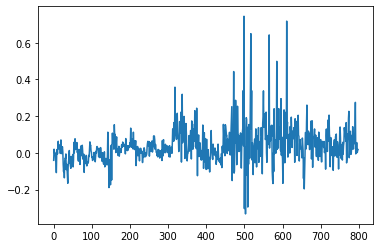

In [534]:
df2['PRIVATE_SHR_DIFF'].plot()

In [535]:
len(df2[df2['PRIVATE_SHR_DIFF'] < -0])

256

In [536]:
len(df2[df2['PRIVATE_SHR_DIFF'] > 0.5])

4

In [537]:
df2[df2['PRIVATE_SHR_DIFF'] < 0]

,ORIGIN,OBSERVED_PRIVATE_TRIP,OBSERVED_SHARED_TRIP,SHARED_PROBABILITY,PRIVATE_PROBABILITY,OBSERVED_PRIVATE_SHR,PREDICTED_PRIVATE_SHR,PRIVATE_TRIPS_DIFF,SHARED_TRIPS_DIFF,PRIVATE_SHR_DIFF
0,1.703101e+10,662,293,331.647652,623.352348,0.693194,0.652725,-38.647652,38.647652,-0.040469
3,1.703101e+10,820,371,381.298580,809.701420,0.688497,0.679850,-10.298580,10.298580,-0.008647
4,1.703101e+10,1216,392,393.496277,1214.503723,0.756219,0.755288,-1.496277,1.496277,-0.000931
5,1.703101e+10,686,288,328.067077,645.932923,0.704312,0.663175,-40.067077,40.067077,-0.041137
6,1.703101e+10,754,302,346.378131,709.621869,0.714015,0.671990,-44.378131,44.378131,-0.042025
...,...,...,...,...,...,...,...,...,...,...
769,1.703184e+10,1787,519,593.669332,1712.330668,0.774935,0.742554,-74.669332,74.669332,-0.032380
775,1.703184e+10,21,9,9.788143,20.211857,0.700000,0.673729,-0.788143,0.788143,-0.026271
779,1.703184e+10,815,410,419.243883,805.756117,0.665306,0.657760,-9.243883,9.243883,-0.007546
780,1.703184e+10,6140,1313,1368.161200,6084.838800,0.823829,0.816428,-55.161200,55.161200,-0.007401


In [538]:
df2[df2['PRIVATE_SHR_DIFF'] > 0.5]

,ORIGIN,OBSERVED_PRIVATE_TRIP,OBSERVED_SHARED_TRIP,SHARED_PROBABILITY,PRIVATE_PROBABILITY,OBSERVED_PRIVATE_SHR,PREDICTED_PRIVATE_SHR,PRIVATE_TRIPS_DIFF,SHARED_TRIPS_DIFF,PRIVATE_SHR_DIFF
499,1.703152e+10,0,1,0.255741,0.744259,0.0,0.744259,0.744259,-0.744259,0.744259
517,1.703156e+10,0,5,1.752825,3.247175,0.0,0.649435,3.247175,-3.247175,0.649435
565,1.703163e+10,0,3,1.072503,1.927497,0.0,0.642499,1.927497,-1.927497,0.642499
611,1.703167e+10,0,1,0.282281,0.717719,0.0,0.717719,0.717719,-0.717719,0.717719


In [39]:
import geopandas as gp

geo = gp.read_file('C:/Workspace/TNC-Demand-Model/Inputs/Census Shapefiles/Illinois/Chicago Tracts/geo_export_558aad9f-98d8-4dd5-a6b1-c1730155d596.shp')


In [40]:
geo['geoid10'] = geo.geoid10.astype(float)

In [41]:
centroids = pd.read_csv('C:/Workspace/TNC-Demand-Model/otp/points.csv')
centroids = gp.GeoDataFrame(centroids)
centroids['GEOID']  = centroids['GEOID'].astype(float)

In [42]:
import folium

In [37]:
df3 = df[['ORIGIN','SHARED_PROBABILITY','PRIVATE_PROBABILITY','DESTINATION']].groupby(by = ['ORIGIN','DESTINATION'], as_index = False).sum()

In [38]:
df3[['SHARED_PROBABILITY','ORIGIN','DESTINATION']].to_csv('Predicted_Shared_Trips.csv')

In [49]:
# Initialize the map:
import folium
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [0, 0.25, 0.5, 0.75, 1]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Observed Shared Share of Trips',
 data=df2,
 columns = ['ORIGIN', 'OBSERVED_SHARED_SHR'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Observed Shared Share of Trips',
 highlight = True
)

#folium.LayerControl().add_to(m)

feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

for tract2 in centroids.GEOID:
    row = centroids[centroids['GEOID'] == tract2]
    folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

m.add_child(feature_group)

    
folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Observed_Shared_Share.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [539]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [0, 0.25, 0.5, 0.75, 0.9, 1]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Predicted Private Share of Trips',
 data=df2,
 columns = ['ORIGIN', 'PREDICTED_PRIVATE_SHR'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Pred Private Share of Trips',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Predicted_Private_Share.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [542]:
df2['PRIVATE_SHR_DIFF'].min()

-0.33231444059918425

In [553]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [-0.5, -0.1, 0, 0.1, 0.5, 1]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Difference Private Share of Trips',
 data=df2,
 columns = ['ORIGIN', 'PRIVATE_SHR_DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Diff Private Share of Trips',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Difference_Private_Share.html')



In [549]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

#bins = [0, 0.25, 0.5, 0.75, 0.9, 1]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Observed Private Total Trips',
 data=df2,
 columns = ['ORIGIN', 'OBSERVED_PRIVATE_TRIP'],
 key_on='feature.properties.geoid10',
 fill_color='RdGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 #bins = bins,
 legend_name='Obs Private Number of Trips',
 highlight = True
)

#folium.LayerControl().add_to(m)

feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

for tract2 in centroids.GEOID:
    row = centroids[centroids['GEOID'] == tract2]
    folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

m.add_child(feature_group)

    
folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Observed_Private_Trips.html')



ValueError: RdGn is not a valid ColorBrewer code

In [544]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

#bins = [0, 0.25, 0.5, 0.75, 0.9, 1]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Predicted Private Total Trips',
 data=df2,
 columns = ['ORIGIN', 'SHARED_PROBABILITY'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 #bins = bins,
 legend_name='Pred Private Number of Trips',
 highlight = True
)

#folium.LayerControl().add_to(m)

feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

for tract2 in centroids.GEOID:
    row = centroids[centroids['GEOID'] == tract2]
    folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

m.add_child(feature_group)

    
folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Predicted_Private_Trips.html')



In [557]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [-1500, -750, -250, 0, 250, 750]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Private Total Trips Difference',
 data=df2,
 columns = ['ORIGIN', 'PRIVATE_TRIPS_DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Private Number of Trips Difference',
 highlight = True
)

#folium.LayerControl().add_to(m)

feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

for tract2 in centroids.GEOID:
    row = centroids[centroids['GEOID'] == tract2]
    folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

m.add_child(feature_group)

    
folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Private_Trips_Difference.html')



In [381]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

#bins = [0, 0.25, 0.5, 0.75, 0.9, 1]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Observed Shared Total Trips',
 data=df2,
 columns = ['ORIGIN', 'OBSERVED_SHARED_TRIP'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 #bins = bins,
 legend_name='Obs Shared Number of Trips',
 highlight = True
)

#folium.LayerControl().add_to(m)

feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

for tract2 in centroids.GEOID:
    row = centroids[centroids['GEOID'] == tract2]
    folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

m.add_child(feature_group)

    
folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Observed_Shared_Trips.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [546]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

#bins = [0, 0.25, 0.5, 0.75, 0.9, 1]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Predicted Shared Total Trips',
 data=df2,
 columns = ['ORIGIN', 'SHARED_PROBABILITY'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 #bins = bins,
 legend_name='Pred Shared Number of Trips',
 highlight = True
)

#folium.LayerControl().add_to(m)

feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

for tract2 in centroids.GEOID:
    row = centroids[centroids['GEOID'] == tract2]
    folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

m.add_child(feature_group)

    
folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Predicted_Shared_Trips.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [384]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

#bins = [0, 0.25, 0.5, 0.75, 0.9, 1]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Shared Total Trips Difference',
 data=df2,
 columns = ['ORIGIN', 'SHARED_TRIPS_DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 #bins = bins,
 legend_name='Shared Number of Trips Difference',
 highlight = True
)

#folium.LayerControl().add_to(m)

feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

for tract2 in centroids.GEOID:
    row = centroids[centroids['GEOID'] == tract2]
    folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

m.add_child(feature_group)

    
folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Shared_Trips_Difference.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
